In [1]:
import tensorflow as tf 
import pandas as pd 
import seaborn as sns 
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Cellphone.csv', sep=',')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.shape

(161, 14)

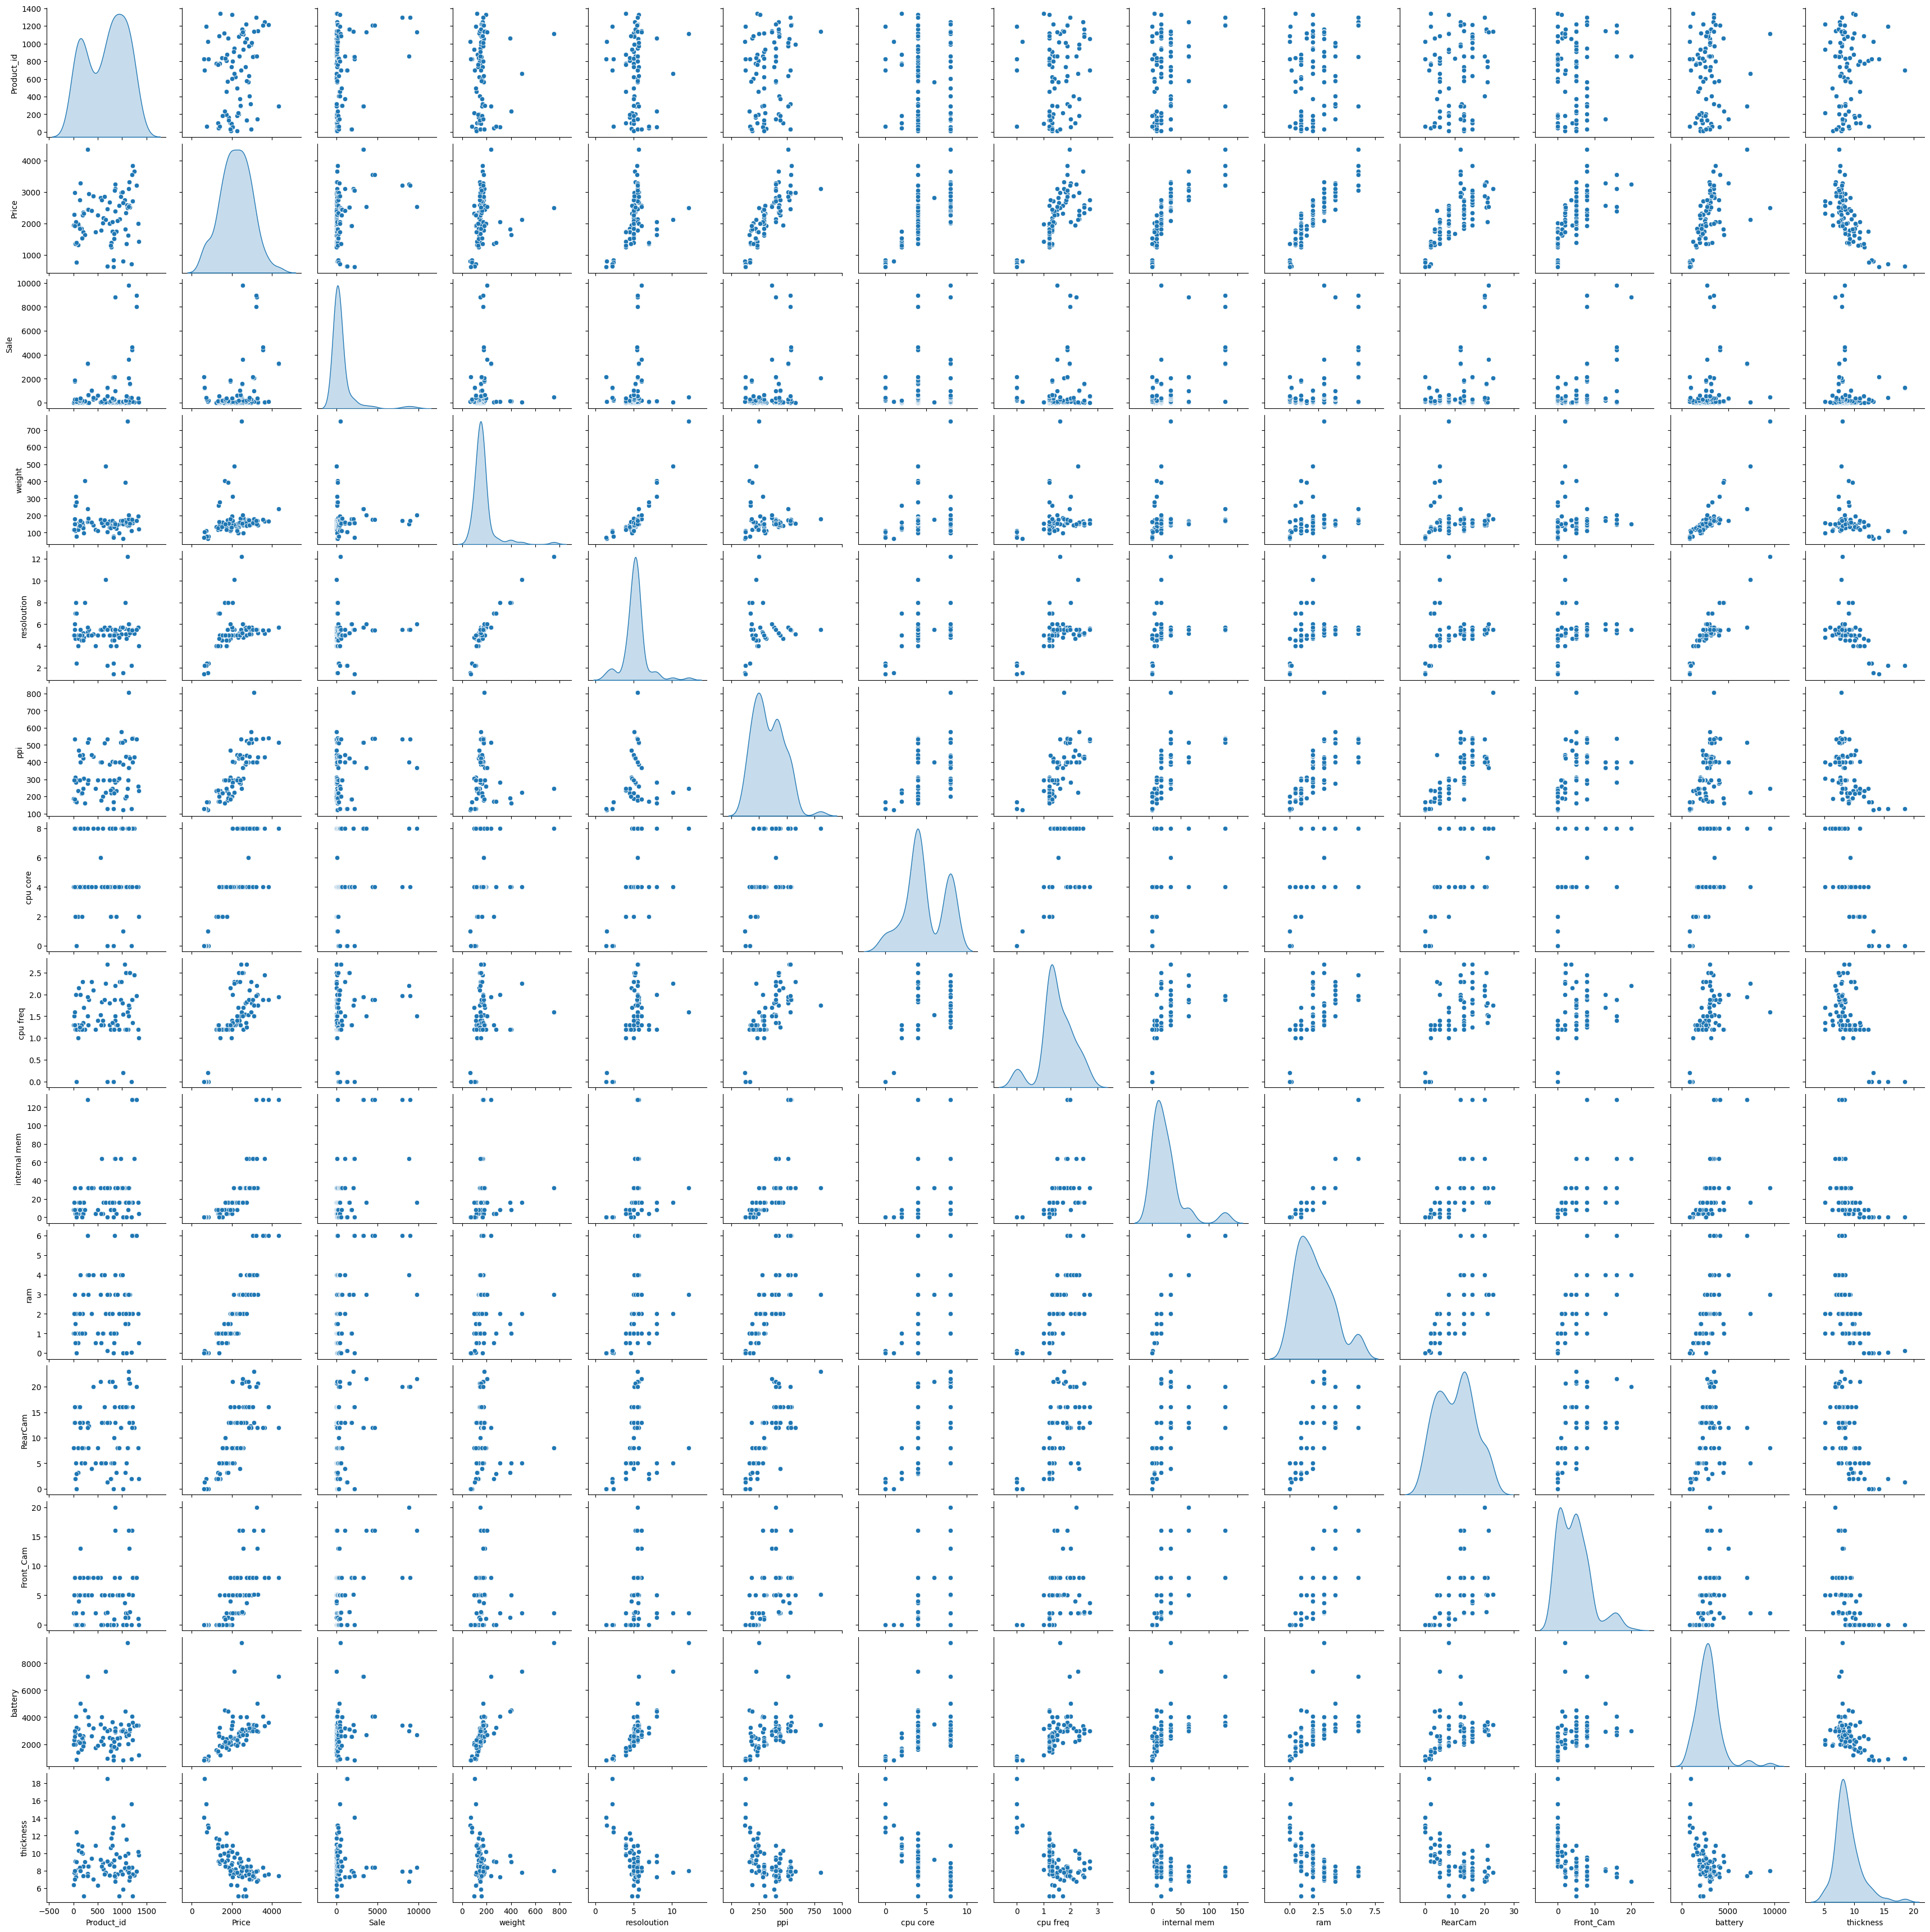

In [4]:
sns.pairplot(data[['Product_id',	'Price',	'Sale',	'weight',	'resoloution',	'ppi',	'cpu core',	'cpu freq',	'internal mem',	'ram',	'RearCam',	'Front_Cam',	'battery',	'thickness']], diag_kind='kde')


In [5]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data[:5])

tf.Tensor(
[[2.030e+02 2.357e+03 1.000e+01 1.350e+02 5.200e+00 4.240e+02 8.000e+00
  1.350e+00 1.600e+01 3.000e+00 1.300e+01 8.000e+00 2.610e+03 7.400e+00]
 [8.800e+02 1.749e+03 1.000e+01 1.250e+02 4.000e+00 2.330e+02 2.000e+00
  1.300e+00 4.000e+00 1.000e+00 3.150e+00 0.000e+00 1.700e+03 9.900e+00]
 [4.000e+01 1.916e+03 1.000e+01 1.100e+02 4.700e+00 3.120e+02 4.000e+00
  1.200e+00 8.000e+00 1.500e+00 1.300e+01 5.000e+00 2.000e+03 7.600e+00]
 [9.900e+01 1.315e+03 1.100e+01 1.185e+02 4.000e+00 2.330e+02 2.000e+00
  1.300e+00 4.000e+00 5.120e-01 3.150e+00 0.000e+00 1.400e+03 1.100e+01]
 [8.800e+02 1.749e+03 1.100e+01 1.250e+02 4.000e+00 2.330e+02 2.000e+00
  1.300e+00 4.000e+00 1.000e+00 3.150e+00 0.000e+00 1.700e+03 9.900e+00]], shape=(5, 14), dtype=float32)


In [6]:
tensor_data =tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[7.740e+02 1.238e+03 1.300e+01 1.341e+02 4.000e+00 2.330e+02 2.000e+00
  1.200e+00 8.000e+00 1.000e+00 2.000e+00 0.000e+00 1.560e+03 1.170e+01]
 [3.010e+02 2.445e+03 6.160e+02 1.830e+02 5.000e+00 2.940e+02 4.000e+00
  1.300e+00 3.200e+01 3.000e+00 8.000e+00 5.000e+00 4.000e+03 8.500e+00]
 [1.161e+03 2.508e+03 1.530e+03 1.520e+02 5.200e+00 4.240e+02 4.000e+00
  2.500e+00 1.600e+01 3.000e+00 2.070e+01 2.200e+00 3.100e+03 7.300e+00]
 [1.330e+02 2.744e+03 2.080e+02 1.420e+02 5.000e+00 4.400e+02 8.000e+00
  1.250e+00 1.600e+01 2.000e+00 1.600e+01 8.000e+00 2.700e+03 8.000e+00]
 [3.770e+02 2.409e+03 1.043e+03 1.600e+02 5.000e+00 4.410e+02 4.000e+00
  2.300e+00 3.200e+01 2.000e+00 4.000e+00 5.000e+00 2.600e+03 9.400e+00]], shape=(5, 14), dtype=float32)


In [7]:
X = tensor_data[:, 3:-1]
print(X[:5])

tf.Tensor(
[[1.341e+02 4.000e+00 2.330e+02 2.000e+00 1.200e+00 8.000e+00 1.000e+00
  2.000e+00 0.000e+00 1.560e+03]
 [1.830e+02 5.000e+00 2.940e+02 4.000e+00 1.300e+00 3.200e+01 3.000e+00
  8.000e+00 5.000e+00 4.000e+03]
 [1.520e+02 5.200e+00 4.240e+02 4.000e+00 2.500e+00 1.600e+01 3.000e+00
  2.070e+01 2.200e+00 3.100e+03]
 [1.420e+02 5.000e+00 4.400e+02 8.000e+00 1.250e+00 1.600e+01 2.000e+00
  1.600e+01 8.000e+00 2.700e+03]
 [1.600e+02 5.000e+00 4.410e+02 4.000e+00 2.300e+00 3.200e+01 2.000e+00
  4.000e+00 5.000e+00 2.600e+03]], shape=(5, 10), dtype=float32)


In [8]:
y = tensor_data[:, -1]
print(y[:5].shape)
y =tf.expand_dims(y, axis= -1)
print(y[:5])

(5,)
tf.Tensor(
[[11.7]
 [ 8.5]
 [ 7.3]
 [ 8. ]
 [ 9.4]], shape=(5, 1), dtype=float32)


In [9]:
print(X.shape)

(161, 10)


In [10]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [11]:

X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(128, 10)
(128, 1)


In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)


In [13]:

X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(16, 10)
(16, 1)


In [14]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:

X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(17, 10)
(17, 1)


In [16]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [17]:
for x,y in train_dataset:
    print(x, y)
    break

tf.Tensor(
[[1.341e+02 4.000e+00 2.330e+02 2.000e+00 1.200e+00 8.000e+00 1.000e+00
  2.000e+00 0.000e+00 1.560e+03]
 [1.420e+02 5.000e+00 4.400e+02 8.000e+00 1.250e+00 1.600e+01 2.000e+00
  1.600e+01 8.000e+00 2.700e+03]
 [1.830e+02 5.000e+00 2.940e+02 4.000e+00 1.300e+00 3.200e+01 3.000e+00
  8.000e+00 5.000e+00 4.000e+03]
 [1.120e+02 5.000e+00 2.940e+02 8.000e+00 1.400e+00 8.000e+00 1.000e+00
  8.000e+00 8.000e+00 1.900e+03]
 [1.690e+02 5.700e+00 5.150e+02 4.000e+00 1.875e+00 6.400e+01 4.000e+00
  1.200e+01 5.000e+00 3.500e+03]
 [4.040e+02 8.000e+00 1.600e+02 4.000e+00 1.200e+00 8.000e+00 1.000e+00
  5.000e+00 5.000e+00 4.500e+03]
 [1.392e+02 4.700e+00 4.690e+02 4.000e+00 2.150e+00 1.600e+01 2.000e+00
  1.600e+01 4.000e+00 2.200e+03]
 [1.180e+02 4.000e+00 2.450e+02 4.000e+00 1.200e+00 4.000e+00 5.120e-01
  5.000e+00 2.000e+00 1.730e+03]
 [1.450e+02 5.100e+00 4.320e+02 4.000e+00 2.500e+00 1.600e+01 2.000e+00
  1.600e+01 2.000e+00 2.800e+03]
 [1.280e+02 4.500e+00 2.450e+02 4.000e+00 1.

In [18]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[-0.38088414, -0.74105346, -0.71910375, -1.1296636 , -0.47007835,
        -0.5638585 , -0.7191188 , -1.3091263 , -1.0172857 , -0.8892419 ],
       [ 0.10974785, -0.11811505, -0.27776104, -0.31732124, -0.31144828,
         0.33995324,  0.53458846, -0.3410837 ,  0.1850463 ,  0.78004754],
       [-0.20128678,  0.00647251,  0.66280544, -0.31732124,  1.5921144 ,
        -0.2625879 ,  0.53458846,  1.7079397 , -0.4882596 ,  0.16432601],
       [-0.30162054, -0.11811505,  0.77856743,  1.3073635 , -0.3907633 ,
        -0.2625879 , -0.09226515,  0.9496397 ,  0.9064455 , -0.10932798],
       [-0.12101978, -0.11811505,  0.78580254, -0.31732124,  1.274854  ,
         0.33995324, -0.09226515, -0.98644537,  0.1850463 , -0.17774148]],
      dtype=float32)>

In [19]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),  
    normalizer,
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])


model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


d:\compV\vision\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 10)             │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,654 (397.09 KB)

 Trainable params: 101,633 (397.00 KB)

 Non-trainable params: 21 (88.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [20]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanAbsoluteError(), 
              metrics=[RootMeanSquaredError()])


In [21]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 8.4613 - root_mean_squared_error: 8.7080 - val_loss: 8.3975 - val_root_mean_squared_error: 8.7772
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2541 - root_mean_squared_error: 7.5218 - val_loss: 6.7928 - val_root_mean_squared_error: 7.2417
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3695 - root_mean_squared_error: 5.7950 - val_loss: 4.2880 - val_root_mean_squared_error: 4.9081
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2599 - root_mean_squared_error: 3.8118 - val_loss: 2.7140 - val_root_mean_squared_error: 3.3585
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0475 - root_mean_squared_error: 4.4320 - val_loss: 2.5551 - val_root_mean_squared_error: 3.0830
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6701 - root_mean_squared_error: 3.7226 - val_loss: 1.9976 - val_root_mean_squared_error: 2.4891
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0955 - roo

In [22]:
history.history


{'loss': [8.51080322265625,
  7.209478378295898,
  5.1527204513549805,
  3.0995702743530273,
  3.2088687419891357,
  2.7314352989196777,
  2.185269832611084,
  2.2588999271392822,
  2.018538236618042,
  1.7509098052978516,
  1.7038869857788086,
  1.5625262260437012,
  1.5666593313217163,
  1.4772343635559082,
  1.4049285650253296,
  1.3247971534729004,
  1.2806706428527832,
  1.2106986045837402,
  1.1606693267822266,
  1.0954381227493286,
  1.0598220825195312,
  1.0113269090652466,
  0.9755759239196777,
  0.890119194984436,
  0.8889930844306946,
  0.8155763745307922,
  0.7965120077133179,
  0.8292595744132996,
  0.7365131974220276,
  0.7317987084388733,
  0.6906547546386719,
  0.658637285232544,
  0.6011571288108826,
  0.6312869191169739,
  0.5835396647453308,
  0.5099847912788391,
  0.5639597177505493,
  0.49422410130500793,
  0.5400097966194153,
  0.4656885266304016,
  0.5571420192718506,
  0.5085804462432861,
  0.5207561254501343,
  0.519008457660675,
  0.48482823371887207,
  0.5366

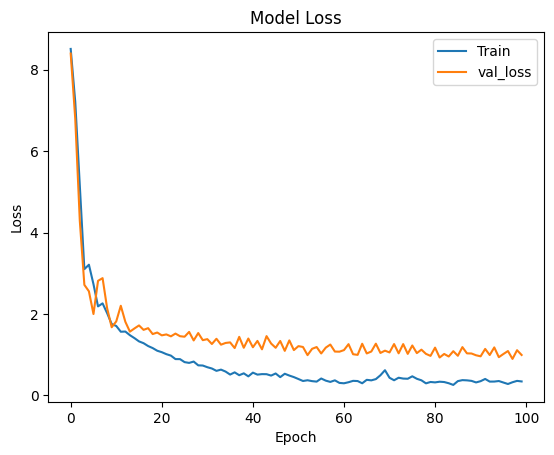

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_loss'])
plt.show()

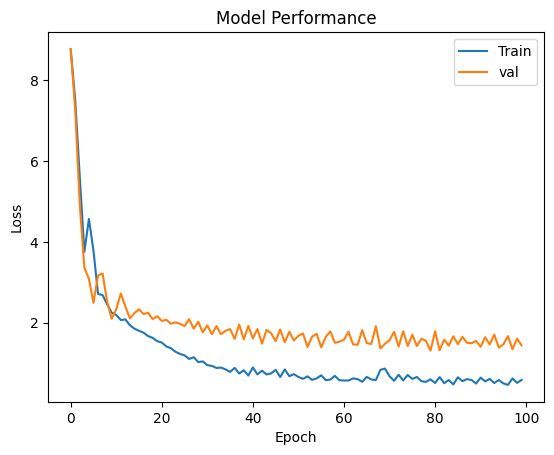

In [24]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'])
plt.show()

In [25]:
model.evaluate(X_val, y_val)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9912 - root_mean_squared_error: 1.4339


[0.9912369847297668, 1.4338840246200562]

In [26]:
model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5394 - root_mean_squared_error: 0.6116


[0.5394095182418823, 0.6115773320198059]

In [27]:
model.predict(tf.expand_dims( X_test[0], axis = 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[7.8705564]], dtype=float32)

In [28]:
y_true = list(y_test[:,0].numpy())

In [29]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
[7.870557, 9.607239, 10.91898, 9.079643, 7.6231117, 7.9896665, 8.453854, 9.69133, 6.9709487, 6.3201065, 8.608934, 8.428433, 8.628899, 11.460495, 8.295895, 8.887114, 7.424643]


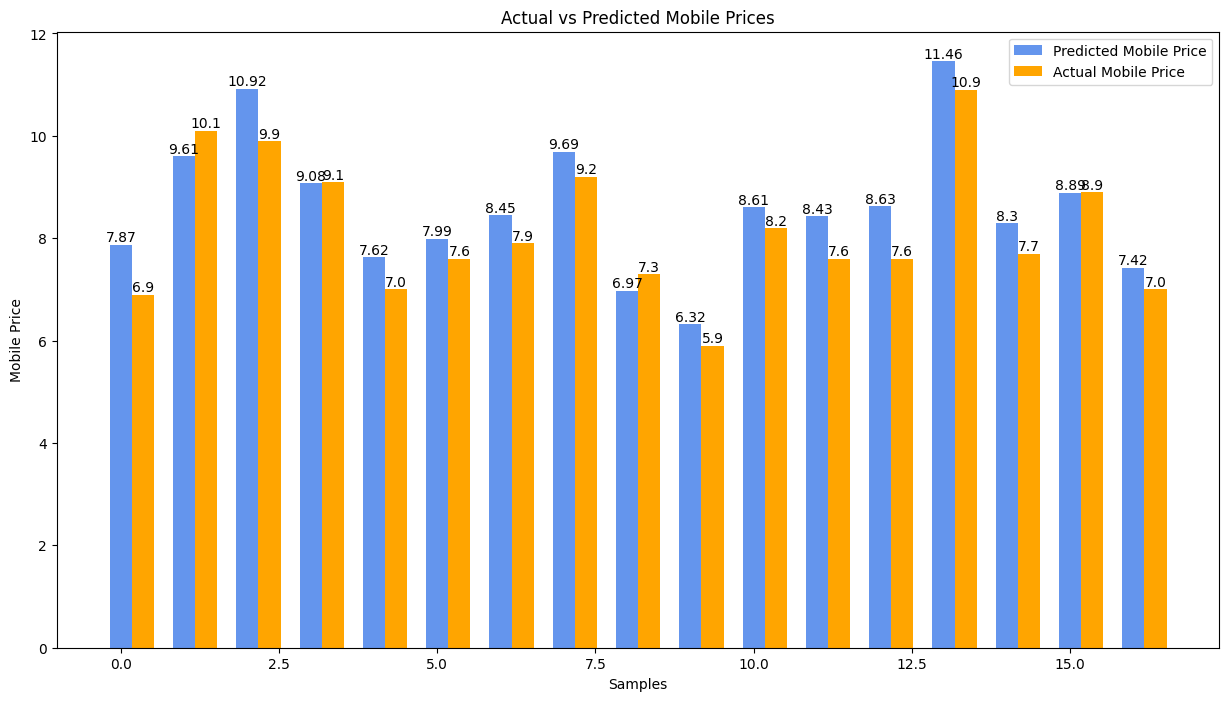

In [32]:
ind = np.arange(len(y_test))  
width = 0.35  

plt.figure(figsize=(15, 8))  
bars1 = plt.bar(ind, y_pred, width, label='Predicted Mobile Price', color='cornflowerblue')
bars2 = plt.bar(ind + width, y_true, width, label='Actual Mobile Price', color='orange')

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Samples')
plt.ylabel('Mobile Price')
plt.title('Actual vs Predicted Mobile Prices')
plt.legend()
plt.show()
